#### Project 2

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

In [17]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics',
'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware',
'comp.sys.mac.hardware','rec.autos',
'rec.motorcycles','rec.sport.baseball',
'rec.sport.hockey']
datagroup2 = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

In [18]:
datagroup2.target

array([2, 1, 2, ..., 2, 3, 4])

In [19]:
datagroup2.target_names

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey']

#### Part 1

In [20]:
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop_words_en = stopwords.words('english')
from string import punctuation
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
print len(combined_stopwords)

410


In [21]:
# overwrite analyzer with callable function:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()
def rmv_stop_punc(doc):
    return (word for word in analyzer(doc) if word not in combined_stopwords and not word.isdigit())

In [22]:
count_vect = CountVectorizer(min_df=3,analyzer=rmv_stop_punc)
# count_vect = CountVectorizer(min_df=5,analyzer=stem_rmv_punc)
X_counts = count_vect.fit_transform(datagroup2.data)
X_counts.shape` # 7882 docs

(7882, 25535)

In [120]:
X_counts.toarray()[300:400,0:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print X_tfidf.shape
print '-' * 20
print X_counts.toarray()[500:600,5:15]
print '-' * 20
print X_tfidf.toarray()[500:600,5:15]

(7882, 25535)
--------------------
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]

In [42]:
target2_names=['Computer technology','Recreational activity']
labels_2=np.zeros((7882,),dtype=int)
for i in range(0,len(datagroup2.target)):
    if datagroup2.target[i]<=3:
        labels_2[i]=0
    else:
        labels_2[i]=1
labels_2.shape

(7882,)

In [41]:
labels_2

array([0, 0, 0, ..., 0, 0, 1])

#### Part 2

In [178]:
from sklearn.cluster import KMeans, MiniBatchKMeans
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=30)
km.fit(X_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

##### 2(a)

In [179]:
contingency_matrix=np.zeros((2,2),dtype=int)
for i in range(0,len(labels_2)):
    contingency_matrix[labels_2[i]][km.labels_[i]]+=1
contingency_matrix

array([[   3, 3900],
       [1684, 2295]])

##### 2(b)

In [180]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_2, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels_2, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_2, km.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(labels_2, km.labels_))
print("Adjusted Mutual Info: %.3f"% metrics.adjusted_mutual_info_score(labels_2, km.labels_))

Homogeneity: 0.248
Completeness: 0.332
V-measure: 0.284
Adjusted Rand-Index: 0.174
Adjusted Mutual Info: 0.248


#### Part 3 (a)

(i)

In [122]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, n_iter=5)
X_svd=svd.fit_transform(X_tfidf)
X_svd

array([[ 0.12135135,  0.01766373, -0.01536145, ...,  0.00441354,
        -0.00215086, -0.00212774],
       [ 0.11508107,  0.05687015, -0.03621786, ..., -0.01335214,
         0.04918343,  0.02592435],
       [ 0.15183779,  0.13874133,  0.09643566, ..., -0.02060051,
        -0.0697819 ,  0.04172359],
       ..., 
       [ 0.10894988,  0.01558605, -0.0327572 , ..., -0.00553278,
        -0.02245053, -0.00660862],
       [ 0.13956474,  0.00995121, -0.01577857, ..., -0.01530005,
        -0.00359357,  0.01892037],
       [ 0.08739415,  0.00196168, -0.01509109, ..., -0.00848023,
        -0.03402164,  0.02782129]])

In [49]:
X_svd.shape

(7882, 50)

In [51]:
variance

843.75756202745379

In [107]:
x_t=X_tfidf.toarray().transpose()
xxx=np.matmul(X_tfidf.toarray(),x_t)
v=np.trace(xxx)

In [117]:
X_tfidf.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [104]:
X_tfidf.toarray()[:,0:10].shape

(7882, 10)

In [140]:
vratio_list=[]
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000, n_iter=5)
X_svd_tmp=svd.fit_transform(X_tfidf)
variance=svd.explained_variance_
rr=svd.explained_variance_ratio_
print variance
print rr

[ 0.00115427  0.0052314   0.00369347  0.00361672  0.0032605   0.00256996
  0.00252142  0.00241371  0.00235694  0.00221681  0.00218615  0.00211757
  0.0020702   0.00201937  0.00197342  0.00193936  0.00193114  0.00186803
  0.00181119  0.00181103  0.00176398  0.00173681  0.00169151  0.00168155
  0.0016508   0.00164532  0.00160554  0.00159241  0.00157431  0.00156098
  0.00154644  0.00153439  0.00151432  0.00149344  0.00148424  0.00147026
  0.00146074  0.00145853  0.00144728  0.00141091  0.00139759  0.0013836
  0.00137412  0.00136841  0.00134945  0.00134285  0.00133047  0.00131988
  0.00131718  0.00130783  0.00130004  0.00127685  0.001267    0.00126068
  0.00125061  0.00124744  0.00124062  0.00123565  0.001234    0.00122125
  0.00120965  0.00120376  0.0012018   0.0011878   0.00118362  0.00116685
  0.00115917  0.00115532  0.0011434   0.00114005  0.00113462  0.00112968
  0.0011186   0.00111036  0.00110542  0.00110316  0.00109691  0.0010887
  0.00108265  0.0010789   0.0010723   0.00107042  0.0

In [141]:
vratio_list=[]
sum=0
for i in range(0,1000):
    sum+=rr[i]
    vratio_list.append(sum)
vratio_list

[0.0011715453484580315,
 0.0064812362274106593,
 0.010229980219794568,
 0.01390082890691122,
 0.017210124394924847,
 0.019818549079642339,
 0.022377706384973457,
 0.024827542064220446,
 0.027219753202825592,
 0.029469742568989363,
 0.031688615268477965,
 0.033837878158020814,
 0.035939064672077692,
 0.037988653932835313,
 0.039991606250072989,
 0.041959986129474575,
 0.043920023157315996,
 0.045816006498363482,
 0.047654299394995998,
 0.049492431522678695,
 0.051282814952367861,
 0.053045615605422196,
 0.054762441069044834,
 0.056469156445352969,
 0.05814465831489183,
 0.059814597592489839,
 0.061444163166290547,
 0.063060407505297844,
 0.064658277369369022,
 0.066242621903018384,
 0.067812206488097312,
 0.069369555591207721,
 0.070906535587910602,
 0.072422328291598309,
 0.073928782962060194,
 0.075421043766280754,
 0.076903649708586999,
 0.078384011719822178,
 0.079852949427048306,
 0.081284979607790339,
 0.082703487102941939,
 0.084107793846600984,
 0.085502478023952513,
 0.08689137

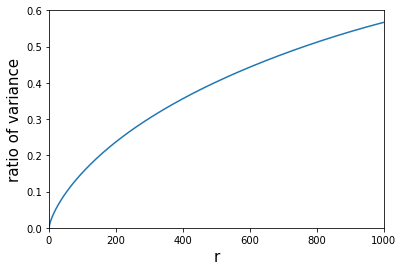

In [143]:
k=np.arange(1,1001,1)
plt.plot(k, vratio_list)
plt.axis([1,1000, 0, 0.6])
plt.xlabel('r',fontsize=15)
plt.ylabel('ratio of variance',fontsize=15)
plt.show()

In [145]:
X_svd_tmp.shape

(7882, 1000)

(ii) SVD

In [174]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
def svd_kmeans(x_svd,r,labels_2):
    x_new=x_svd[:,0:r]
    print x_new.shape
    km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=30)
    km.fit(x_new)
    h=metrics.homogeneity_score(labels_2, km.labels_)
    c=metrics.completeness_score(labels_2, km.labels_)
    v=metrics.v_measure_score(labels_2, km.labels_)
    ar=metrics.adjusted_rand_score(labels_2, km.labels_)
    am= metrics.adjusted_mutual_info_score(labels_2, km.labels_)
    print metrics.confusion_matrix(labels_2,km.labels_)
    print("Homogeneity: %0.3f" % h)
    print("Completeness: %0.3f" % c)
    print("V-measure: %0.3f" % v)
    print("Adjusted Rand-Index: %.3f"% ar)
    print("Adjusted Mutual Info: %.3f"% am)
    return h,c,v,ar,am

In [175]:
homo_list=[]
complete_list=[]
v_list=[]
adj_rand_list=[]
adj_mutual_list=[]

In [176]:
for i in 1,2,3,5,10,20,50,100,300:
    h1,c1,v1,ar1,am1=svd_kmeans(X_svd_tmp,i,labels_2)
    homo_list.append(h1)
    complete_list.append(c1)
    v_list.append(v1)
    adj_rand_list.append(ar1)
    adj_mutual_list.append(am1)

(7882, 1)
[[1817 2086]
 [1730 2249]]
Homogeneity: 0.001
Completeness: 0.001
V-measure: 0.001
Adjusted Rand-Index: 0.001
Adjusted Mutual Info: 0.001
(7882, 2)
[[ 157 3746]
 [3300  679]]
Homogeneity: 0.536
Completeness: 0.542
V-measure: 0.539
Adjusted Rand-Index: 0.621
Adjusted Mutual Info: 0.536
(7882, 3)
[[3888   15]
 [1939 2040]]
Homogeneity: 0.305
Completeness: 0.369
V-measure: 0.334
Adjusted Rand-Index: 0.254
Adjusted Mutual Info: 0.305
(7882, 5)
[[3898    5]
 [2412 1567]]
Homogeneity: 0.226
Completeness: 0.313
V-measure: 0.262
Adjusted Rand-Index: 0.149
Adjusted Mutual Info: 0.225
(7882, 10)
[[   3 3900]
 [1639 2340]]
Homogeneity: 0.240
Completeness: 0.326
V-measure: 0.277
Adjusted Rand-Index: 0.164
Adjusted Mutual Info: 0.240
(7882, 20)
[[3900    3]
 [2347 1632]]
Homogeneity: 0.239
Completeness: 0.325
V-measure: 0.275
Adjusted Rand-Index: 0.163
Adjusted Mutual Info: 0.239
(7882, 50)
[[3900    3]
 [2333 1646]]
Homogeneity: 0.242
Completeness: 0.326
V-measure: 0.278
Adjusted Rand-In

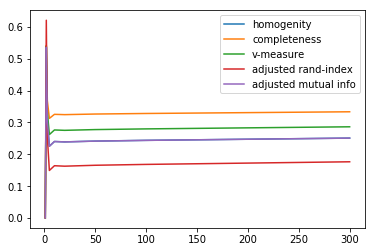

In [184]:
r=[1,2,3,5,10,20,50,100,300]
plt.plot(r, homo_list)
plt.plot(r, complete_list)
plt.plot(r, v_list)
plt.plot(r, adj_rand_list)
plt.plot(r, adj_mutual_list)
plt.legend(['homogenity', 'completeness', 'v-measure', 'adjusted rand-index','adjusted mutual info'], loc='upper right')
plt.show()

(ii) NMF

In [181]:
from sklearn.decomposition import NMF
def nmf_kmeans(r,labels_2):
    nmf = NMF(n_components=r, init='random', random_state=0)
    x_nmf=nmf.fit_transform(X_tfidf)
    print x_nmf.shape
    km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=30)
    km.fit(x_nmf)
    h=metrics.homogeneity_score(labels_2, km.labels_)
    c=metrics.completeness_score(labels_2, km.labels_)
    v=metrics.v_measure_score(labels_2, km.labels_)
    ar=metrics.adjusted_rand_score(labels_2, km.labels_)
    am= metrics.adjusted_mutual_info_score(labels_2, km.labels_)
    print metrics.confusion_matrix(labels_2,km.labels_)
    print("Homogeneity: %0.3f" % h)
    print("Completeness: %0.3f" % c)
    print("V-measure: %0.3f" % v)
    print("Adjusted Rand-Index: %.3f"% ar)
    print("Adjusted Mutual Info: %.3f"% am)
    return h,c,v,ar,am

In [183]:
homo_list2=[]
complete_list2=[]
v_list2=[]
adj_rand_list2=[]
adj_mutual_list2=[]
for i in 1,2,3,5,10,20,50,100,300:
    h1,c1,v1,ar1,am1=nmf_kmeans(i,labels_2)
    homo_list2.append(h1)
    complete_list2.append(c1)
    v_list2.append(v1)
    adj_rand_list2.append(ar1)
    adj_mutual_list2.append(am1)

(7882, 1)
[[1817 2086]
 [1730 2249]]
Homogeneity: 0.001
Completeness: 0.001
V-measure: 0.001
Adjusted Rand-Index: 0.001
Adjusted Mutual Info: 0.001
(7882, 2)
[[3653  250]
 [ 329 3650]]
Homogeneity: 0.622
Completeness: 0.622
V-measure: 0.622
Adjusted Rand-Index: 0.728
Adjusted Mutual Info: 0.622
(7882, 3)
[[3888   15]
 [2274 1705]]
Homogeneity: 0.242
Completeness: 0.319
V-measure: 0.275
Adjusted Rand-Index: 0.176
Adjusted Mutual Info: 0.241
(7882, 5)
[[   5 3898]
 [1319 2660]]
Homogeneity: 0.183
Completeness: 0.281
V-measure: 0.222
Adjusted Rand-Index: 0.105
Adjusted Mutual Info: 0.183
(7882, 10)
[[   2 3901]
 [1326 2653]]
Homogeneity: 0.188
Completeness: 0.287
V-measure: 0.227
Adjusted Rand-Index: 0.106
Adjusted Mutual Info: 0.187
(7882, 20)
[[   2 3901]
 [ 724 3255]]
Homogeneity: 0.095
Completeness: 0.214
V-measure: 0.131
Adjusted Rand-Index: 0.030
Adjusted Mutual Info: 0.095
(7882, 50)
[[3902    1]
 [3472  507]]
Homogeneity: 0.065
Completeness: 0.190
V-measure: 0.097
Adjusted Rand-In

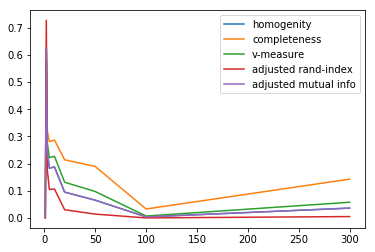

In [186]:
r2=[1,2,3,5,10,20,50,100,300]
plt.plot(r2, homo_list2)
plt.plot(r2, complete_list2)
plt.plot(r2, v_list2)
plt.plot(r2, adj_rand_list2)
plt.plot(r2, adj_mutual_list2)
plt.legend(['homogenity', 'completeness', 'v-measure', 'adjusted rand-index','adjusted mutual info'], loc='upper right')
plt.show()

#### Part 4 (a)

In [194]:
#svd best: r=2
x_svd_2=X_svd_tmp[:,0:2]
km_svd = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=30)
km_svd.fit(x_svd_2)
#nmf best: r=2
nmf = NMF(n_components=2, init='random', random_state=0)
x_nmf_2=nmf.fit_transform(X_tfidf)
km_nmf = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=30)
km_nmf.fit(x_nmf_2)
#true labels: labels_2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Plot clustering result with SVD 

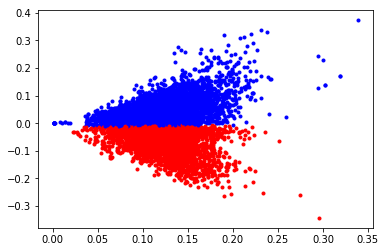

In [204]:
for i in range(0,len(km_svd.labels_)):
    if km_svd.labels_[i]==0:
        plt.plot(x_svd_2[i][0],x_svd_2[i][1],'r.')
    else:
        plt.plot(x_svd_2[i][0],x_svd_2[i][1],'b.')
plt.show()

In [201]:
len(km_svd.labels_)

7882

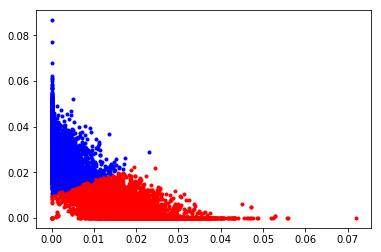

In [205]:
for i in range(0,len(km_nmf.labels_)):
    if km_nmf.labels_[i]==0:
        plt.plot(x_nmf_2[i][0],x_nmf_2[i][1],'r.')
    else:
        plt.plot(x_nmf_2[i][0],x_nmf_2[i][1],'b.')
plt.show()

#### Part 4 (b)

In [280]:
def kmeans_cluster(data,labels):
    km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=30)
    km.fit(data)
    h=metrics.homogeneity_score(labels_2, km.labels_)
    c=metrics.completeness_score(labels_2, km.labels_)
    v=metrics.v_measure_score(labels_2, km.labels_)
    ar=metrics.adjusted_rand_score(labels_2, km.labels_)
    am= metrics.adjusted_mutual_info_score(labels_2, km.labels_)
    print metrics.confusion_matrix(labels_2,km.labels_)
    print("Homogeneity: %0.3f" % h)
    print("Completeness: %0.3f" % c)
    print("V-measure: %0.3f" % v)
    print("Adjusted Rand-Index: %.3f"% ar)
    print("Adjusted Mutual Info: %.3f"% am)
    for i in range(0,len(km.labels_)):
        if km.labels_[i]==0:
            plt.plot(data[i][0],data[i][1],'r.')
        else:
            plt.plot(data[i][0],data[i][1],'b.')
    plt.show()

(i) Normalized nmf

In [244]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_nmf_norm=scaler.fit_transform(x_nmf_2)
x_nmf_norm

array([[ 0.23560725, -0.33901078],
       [ 0.90503701, -1.10849224],
       [ 2.10155626, -1.25807271],
       ..., 
       [ 0.110883  , -0.46566023],
       [ 0.2259374 , -0.00793232],
       [-0.45611257, -0.27167582]])

In [245]:
x_nmf_2

array([[ 0.01188076,  0.01187994],
       [ 0.01805443,  0.0019335 ],
       [ 0.02908908,  0.        ],
       ..., 
       [ 0.01073052,  0.01024285],
       [ 0.01179158,  0.01615952],
       [ 0.00550152,  0.01275033]])

[[ 380 3523]
 [3864  115]]
Homogeneity: 0.672
Completeness: 0.675
V-measure: 0.674
Adjusted Rand-Index: 0.765
Adjusted Mutual Info: 0.672


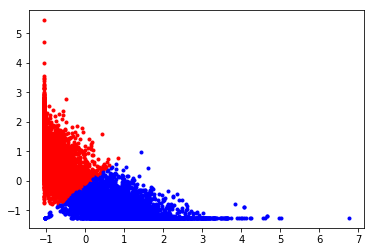

In [246]:
kmeans_cluster(x_nmf_norm,labels_2) 

(i) Normalized SVD

In [242]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_svd_norm=scaler.fit_transform(x_svd_2)
x_svd_norm

array([[ 0.00612192,  0.26459646],
       [-0.17843528,  0.80676016],
       [ 0.90345303,  1.93888014],
       ..., 
       [-0.35890122,  0.23611903],
       [ 0.54221186,  0.15797903],
       [-0.99336831,  0.04760423]])

In [239]:
x_svd_2

array([[ 0.12135136,  0.01765248],
       [ 0.11508111,  0.05686631],
       [ 0.15183778,  0.13875073],
       ..., 
       [ 0.10894986,  0.01559275],
       [ 0.13956478,  0.00994101],
       [ 0.08739413,  0.00195778]])

[[1791 2112]
 [3705  274]]
Homogeneity: 0.209
Completeness: 0.237
V-measure: 0.222
Adjusted Rand-Index: 0.227
Adjusted Mutual Info: 0.209


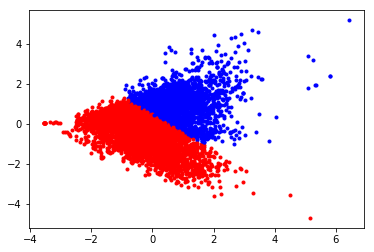

In [243]:
kmeans_cluster(x_svd_norm,labels_2) 

(ii) logarithm transformation NMF

In [228]:
x_nmf_2

array([[ 0.01188076,  0.01187994],
       [ 0.01805443,  0.0019335 ],
       [ 0.02908908,  0.        ],
       ..., 
       [ 0.01073052,  0.01024285],
       [ 0.01179158,  0.01615952],
       [ 0.00550152,  0.01275033]])

In [259]:
x_nmf_bias=x_nmf_2+0.001

In [260]:
x_nmf_bias

array([[ 0.01288076,  0.01287994],
       [ 0.01905443,  0.0029335 ],
       [ 0.03008908,  0.001     ],
       ..., 
       [ 0.01173052,  0.01124285],
       [ 0.01279158,  0.01715952],
       [ 0.00650152,  0.01375033]])

In [261]:
x_nmf_log=np.log(x_nmf_bias)

[[ 450 3453]
 [3884   95]]
Homogeneity: 0.655
Completeness: 0.660
V-measure: 0.658
Adjusted Rand-Index: 0.743
Adjusted Mutual Info: 0.655


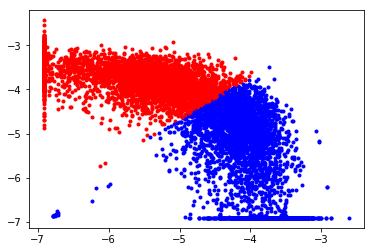

In [262]:
kmeans_cluster(x_nmf_log,labels_2) 

(iii) log+normalize nmf

[[3544  359]
 [ 116 3863]]
Homogeneity: 0.681
Completeness: 0.683
V-measure: 0.682
Adjusted Rand-Index: 0.773
Adjusted Mutual Info: 0.681


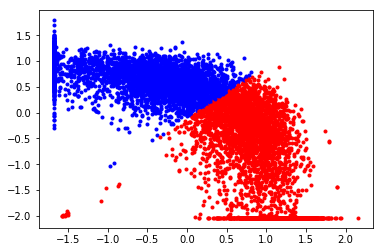

In [265]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_nmf_log_nor=scaler.fit_transform(x_nmf_log)
kmeans_cluster(x_nmf_log_nor,labels_2) 

（iii) normalizt+log nmf

In [277]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=False)
x_nmf_nor=scaler.fit_transform(x_nmf_2)
x_nmf_nor+=0.1
x_nmf_nor

array([[ 1.38826654,  1.01906193],
       [ 2.0576963 ,  0.24958047],
       [ 3.25421555,  0.1       ],
       ..., 
       [ 1.26354229,  0.89241248],
       [ 1.37859669,  1.35014039],
       [ 0.69654671,  1.08639689]])

[[3629  274]
 [ 160 3819]]
Homogeneity: 0.695
Completeness: 0.695
V-measure: 0.695
Adjusted Rand-Index: 0.792
Adjusted Mutual Info: 0.695


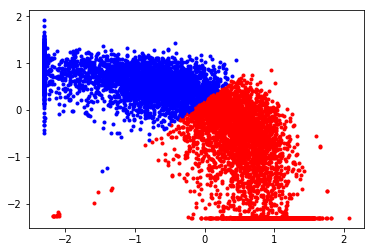

In [278]:
x_nmf_nor_log=np.log(x_nmf_nor)
kmeans_cluster(x_nmf_nor_log,labels_2) 